# Imports 

In [1]:
import ipynb.fs.full.PrepareData as data
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 14%|█▍        | 6/43 [00:00<00:00, 55.56it/s]

[178, 37, 3062, 2854, 3127, 3466, 3663, 4011, 3906, 3768, 3411, 2748, 2674]
2 chs: 178 entries
3 chs: 37 entries
4 chs: 3062 entries
5 chs: 2854 entries
6 chs: 3127 entries
7 chs: 3466 entries
8 chs: 3663 entries
9 chs: 4011 entries
10 chs: 3906 entries
15 chs: 3768 entries
20 chs: 3411 entries
30 chs: 2748 entries
40 chs: 2674 entries


 93%|█████████▎| 40/43 [00:03<00:00,  8.69it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 23%|██▎       | 10/43 [00:01<00:03,  8.45it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 93%|█████████▎| 40/43 [00:06<00:00,  5.75it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:05<00:00,  5.68it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:01, 18.89it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 95%|█████████▌| 41/43 [00:04<00:00,  7.15it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 93%|█████████▎| 40/43 [00:07<00:00,  5.99it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:01, 18.15it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|███████▍  | 32/43 [00:04<00:02,  4.82it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:04<00:00,  6.72it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 93%|█████████▎| 40/43 [00:05<00:00,  7.57it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:01, 22.39it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 95%|█████████▌| 41/43 [00:05<00:00,  5.80it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:05<00:00,  8.12it/s]


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]

sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict.keys())

dict_keys(['LassoCV', 'ElasticNetCV', 'Ridge', 'GradientBoostingRegressor', 'RidgeCV'])


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [4]:
import matplotlib.pyplot as plt

def plotGrid(gainData, lossData):
    fig, axis = plt.subplots(2, figsize = (12, 8))
    fig.suptitle('One regressor per amplifier', fontsize = 16)
    
    axis[0].boxplot(gainData)
    axis[0].set_title("Gain test error")
    
    axis[1].boxplot(lossData)
    axis[1].set_title("Loss test error")
    
    fig.text(0.09, 0.5, 'Mean Absolute error (dB)', va='center', rotation='vertical', fontsize = 14)
    fig.legend(strategyArray, handlelength = 0, loc = "upper right")
    fig.savefig("PerAmp-{}amps".format(data.ampNumber))

# Building the models

In [5]:
X, y = data.loadDataset()
X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.3, random_state = 0)

count = 1

In [6]:
from sklearn.linear_model import LassoCV

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2, 2):
    model = MultiOutputRegressor(LassoCV())
    model.fit(X_train, y_train[:, i: i + 2])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 2]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 2]))
        finalResult = data.np.hstack((finalResult, result))
    
print(finalY[0], finalResult[0])

strategyArray.append("{} - LassoCV".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.71904685  0.68301426 18.44272641  1.2583458  22.43827506  2.44351913
 21.9022987   1.51763112]


In [7]:
from sklearn.linear_model import ElasticNetCV

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2, 2):
    model = MultiOutputRegressor(ElasticNetCV())
    model.fit(X_train, y_train[:, i: i + 2])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 2]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 2]))
        finalResult = data.np.hstack((finalResult, result))
    
print(finalY[0], finalResult[0])

strategyArray.append("{} - ElasticNetCV".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.78908904  0.67534911 18.63576807  1.24973636 22.42417198  2.50190305
 21.91666501  1.49061909]


In [8]:
from sklearn.linear_model import Ridge

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2, 2):
    model = MultiOutputRegressor(Ridge())
    model.fit(X_train, y_train[:, i: i + 2])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 2]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 2]))
        finalResult = data.np.hstack((finalResult, result))
    
print(finalY[0], finalResult[0])

strategyArray.append("{} - Ridge".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.77924665  0.85395938 18.48800411  1.07108927 22.37065783  2.27210603
 21.91160923  1.51592181]


In [9]:
from sklearn.ensemble import GradientBoostingRegressor

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2, 2):
    model = MultiOutputRegressor(GradientBoostingRegressor())
    model.fit(X_train, y_train[:, i: i + 2])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 2]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 2]))
        finalResult = data.np.hstack((finalResult, result))
    
print(finalY[0], finalResult[0])

strategyArray.append("{} - GradientBoostingRegressor".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.5922744   0.58350216 18.27150957  1.04660135 22.3096196   2.21716638
 21.83244731  1.56879631]


In [10]:
from sklearn.linear_model import RidgeCV

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2, 2):
    model = MultiOutputRegressor(RidgeCV())
    model.fit(X_train, y_train[:, i: i + 2])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 2]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 2]))
        finalResult = data.np.hstack((finalResult, result))
    
print(finalY[0], finalResult[0])

strategyArray.append("{} - RidgeCV".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.77924665  0.59716023 18.48800411  1.1766695  22.37065783  2.47484121
 21.91160923  1.51592181]


In [11]:
from sklearn.dummy import DummyRegressor

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2, 2):
    model = MultiOutputRegressor(DummyRegressor())
    model.fit(X_train, y_train[:, i: i + 2])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 2]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 2]))
        finalResult = data.np.hstack((finalResult, result))
    
print(finalY[0], finalResult[0])

strategyArray.append("{} - DummyRegressor".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [21.44345238  4.13988095 21.91964286  1.60416667 22.89880952  1.78571429
 21.08630952  1.58928571]


dict_keys(['LassoCV', 'ElasticNetCV', 'Ridge', 'GradientBoostingRegressor', 'RidgeCV'])


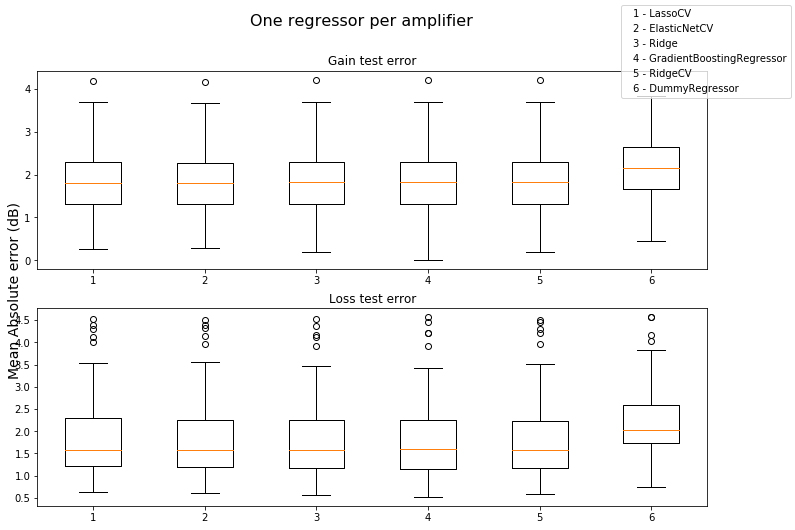

In [12]:
print(sortedDict.keys())
plotGrid(errorArray[0], errorArray[1])